In [123]:
print("Name : ")
print("We will learn how to group by date and plot a line graph for the confidence of the data collected by satellites")
print("Then we will group by date and get the maximum brightness and temperature of the fire")
print("And plot a line graph for showing the correlation between brightness and temperature of fire")


Name : 
We will learn how to group by date and plot a line graph for the confidence of the data collected by satellites
Then we will group by date and get the maximum brightness and temperature of the fire
And plot a line graph for showing the correlation between brightness and temperature of fire


In [124]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('australia_bushfire.csv')

df['month'] = pd.DatetimeIndex(df['acq_date']).month
df

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,month
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0,8
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0,8
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0,8
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0,8
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,2019-09-30,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0,9
36007,-28.2625,128.5494,304.9,1.0,1.0,2019-09-30,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0,9
36008,-28.2941,128.5123,301.7,1.0,1.0,2019-09-30,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0,9
36009,-28.3001,128.5530,303.6,1.0,1.0,2019-09-30,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0,9


In [125]:
#Activity 1
#Group by data and plot a line graph for the average confidence of the satellites for collecting data

group_by_date = df.groupby('acq_date')['confidence'].mean().reset_index()
group_by_date



,acq_date,confidence
0,2019-08-01,63.392344
1,2019-08-02,63.004938
2,2019-08-03,63.880000
3,2019-08-04,63.727273
4,2019-08-05,63.712121
...,...,...
56,2019-09-26,66.959420
57,2019-09-27,65.745055
58,2019-09-28,70.986667
59,2019-09-29,69.178846


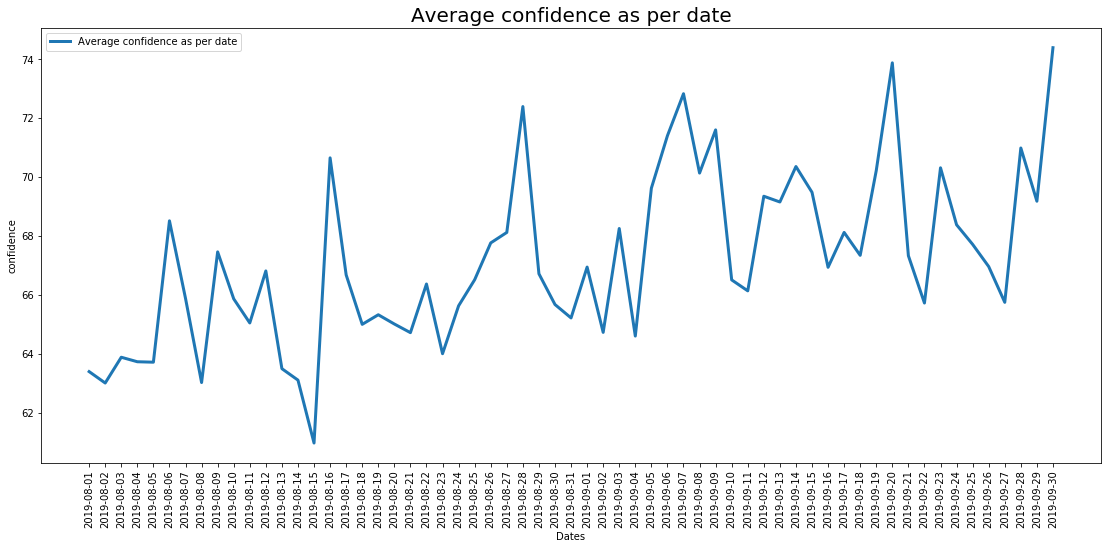

In [126]:
label = group_by_date['acq_date']
value = group_by_date['confidence']

fig = plt.subplots(figsize=(19,8))

plt.plot(label, value, label = "Average confidence as per date" , linewidth=3.0)
plt.xlabel('Dates')
plt.xticks(rotation='vertical')

plt.ylabel('confidence')

plt.title('Average confidence as per date', fontsize=20)

plt.legend()

plt.show()


Conclusion - The data captured by the satellite is almost 65 percent confident (accurate)


In [127]:
#Activity 2
#Show a correlation between the brightness of fire and temperature of fire using line graph

#First - group by date, and find out Max Brightness and create a dataframe out of it
group_by_date_max_brightness = df.groupby('acq_date')['brightness'].max().reset_index()
group_by_date_max_brightness


,acq_date,brightness
0,2019-08-01,402.3
1,2019-08-02,393.9
2,2019-08-03,434.7
3,2019-08-04,442.5
4,2019-08-05,400.1
...,...,...
56,2019-09-26,403.3
57,2019-09-27,399.2
58,2019-09-28,427.7
59,2019-09-29,425.4


In [128]:
#Second - group by date, and find out Max Temperature and create a dataframe out of it
group_by_date_max_temperature = df.groupby('acq_date')['bright_t31'].max().reset_index()
group_by_date_max_temperature


,acq_date,bright_t31
0,2019-08-01,314.5
1,2019-08-02,315.0
2,2019-08-03,321.8
3,2019-08-04,312.8
4,2019-08-05,313.5
...,...,...
56,2019-09-26,321.1
57,2019-09-27,319.8
58,2019-09-28,331.3
59,2019-09-29,327.5


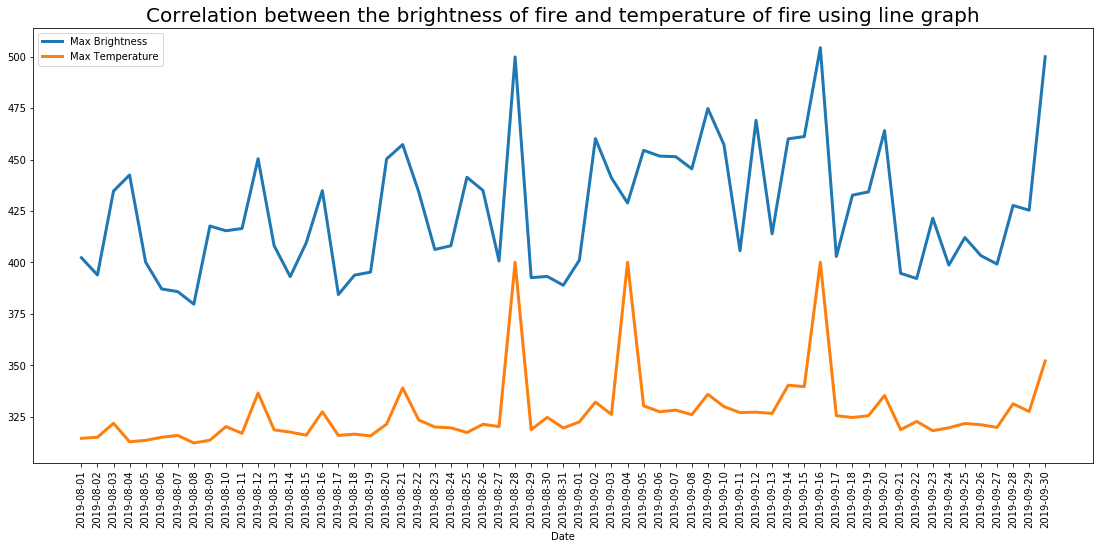

In [129]:
#Thrid - get the data and brightness from group by date max brightness and store in respective variable
brightness_label = group_by_date_max_brightness['acq_date']
brightness_value = group_by_date_max_brightness['brightness']

fig = plt.subplots(figsize=(19,8))

#Forth - plot first line graph for max brightness by date
plt.plot(brightness_label, brightness_value, label = "Max Brightness", linewidth=3.0)

#Fifth - get the data and Temperature from group by date max Temperature and store in respective variable
temperature_label = group_by_date_max_temperature['acq_date']
temperature_value = group_by_date_max_temperature['bright_t31']

#Sixth - plot second line graph for max Temperature by date
plt.plot(temperature_label, temperature_value, label = "Max Temperature", linewidth=3.0)


plt.xlabel('Date')
plt.xticks(rotation='vertical')

plt.title('Correlation between the brightness of fire and temperature of fire using line graph', fontsize=20)

plt.legend()

plt.show()


Conclusion - From the line graph we can observe that when the brightness of the fire increases, at that time the temperature of the fire also increases, hence from this we can draw a conclusion that brightness of the fire and temperature of the fire has a correlation!